In [24]:
import nltk
import numpy as np
import matplotlib.pyplot as plt

In [25]:
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD

In [26]:
wordnet_lemmatizer = WordNetLemmatizer()

In [27]:
titles = [line.rstrip() for line in open('datasets/all_book_titles.txt')]

In [28]:
stopwords = set(w.rstrip() for w in open('datasets/stopwords.txt'))

In [29]:
stopwords

{'a',
 'about',
 'above',
 'across',
 'after',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'among',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyone',
 'anything',
 'anywhere',
 'are',
 'area',
 'areas',
 'around',
 'as',
 'ask',
 'asked',
 'asking',
 'asks',
 'at',
 'away',
 'b',
 'back',
 'backed',
 'backing',
 'backs',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'been',
 'before',
 'began',
 'behind',
 'being',
 'beings',
 'best',
 'better',
 'between',
 'big',
 'both',
 'but',
 'by',
 'c',
 'came',
 'can',
 'cannot',
 'case',
 'cases',
 'certain',
 'certainly',
 'clear',
 'clearly',
 'come',
 'could',
 'd',
 'did',
 'differ',
 'different',
 'differently',
 'do',
 'does',
 'done',
 'down',
 'downed',
 'downing',
 'downs',
 'during',
 'e',
 'each',
 'early',
 'either',
 'end',
 'ended',
 'ending',
 'ends',
 'enough',
 'even',
 'evenly',
 'ever',
 'every',
 'everybody',
 'everyone',
 'everything',
 'everyw

In [30]:
stopwords = stopwords.union({'introduction','edition','series','application', 'approach', 'card', 'access', 'package',
                             'plus','guide','essential','printed','third','second','fourth'})

In [31]:
stopwords

{'a',
 'about',
 'above',
 'access',
 'across',
 'after',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'among',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyone',
 'anything',
 'anywhere',
 'application',
 'approach',
 'are',
 'area',
 'areas',
 'around',
 'as',
 'ask',
 'asked',
 'asking',
 'asks',
 'at',
 'away',
 'b',
 'back',
 'backed',
 'backing',
 'backs',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'been',
 'before',
 'began',
 'behind',
 'being',
 'beings',
 'best',
 'better',
 'between',
 'big',
 'both',
 'but',
 'by',
 'c',
 'came',
 'can',
 'cannot',
 'card',
 'case',
 'cases',
 'certain',
 'certainly',
 'clear',
 'clearly',
 'come',
 'could',
 'd',
 'did',
 'differ',
 'different',
 'differently',
 'do',
 'does',
 'done',
 'down',
 'downed',
 'downing',
 'downs',
 'during',
 'e',
 'each',
 'early',
 'edition',
 'either',
 'end',
 'ended',
 'ending',
 'ends',
 'enough',
 'essential',
 'even',
 'eve

In [32]:
def my_tokenizer(s):
    s = s.lower()
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = [t for t in tokens if len(t)>2]
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
    tokens = [t for t in tokens if t not in stopwords]
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)]
    return tokens

In [46]:
word_index_map = {}
current_index = 0
all_tokens = []
all_titles = []
index_word_map = []

In [47]:
for title in titles:
    try:
        title = title.encode('ascii','ignore')
        all_titles.append(title)
        tokens = my_tokenizer(title)
        all_tokens.append(tokens)
        for token in tokens:
            if token not in word_index_map:
                word_index_map[token] = current_index
                current_index +=1
                index_word_map.append(token)
    except:
        pass

In [48]:
index_word_map

['philosophy',
 'sex',
 'love',
 'reader',
 u'reading',
 'judaism',
 'christianity',
 'islam',
 u'microprocessor',
 u'principle',
 'bernhard',
 'edouard',
 'fernow',
 'story',
 'north',
 'american',
 'forestry',
 'encyclopedia',
 'buddhism',
 'motorola',
 'family',
 'programming',
 'interfacing',
 'anthem',
 'student',
 'modern',
 'era',
 'read',
 'literature',
 'professor',
 'lively',
 'entertaining',
 u'line',
 u'mar',
 u'woman',
 'venus',
 u'secret',
 'improving',
 'communication',
 'lasting',
 'intimacy',
 'fulfillment',
 'giving',
 'receiving',
 'passion',
 'understanding',
 'martian',
 'religious',
 u'tradition',
 'world',
 'journey',
 'africa',
 'mesoamerica',
 'america',
 'hinduism',
 'china',
 'wisdom',
 'sacred',
 u'text',
 u'religion',
 'illustrated',
 'soul',
 'cultivating',
 'life',
 'act',
 'thriving',
 'chaos',
 'handbook',
 'management',
 'revolution',
 'blood',
 u'relative',
 'wheelock',
 'latin',
 'choice',
 'uncertainty',
 'luck',
 'thrive',
 'despite',
 'expanding',

In [51]:
tokens

['society',
 u'actuary',
 'textbook',
 'life',
 u'contingency',
 'chester',
 'wallace',
 'jordan',
 'paperback']

In [52]:
titles[-1]

"Society of Actuaries' Textbook on Life Contingencies - Chester Wallace Jordan - Paperback - 2ND"

In [53]:
np.zeros(2)

array([ 0.,  0.])

In [40]:
def tokens_to_vector(tokens):
    x = np.zeros(len(word_index_map))
    for t in tokens:
        i = word_index_map[t]
        x[i] = 1
        
    return x

In [54]:
N = len(all_tokens)
D = len(word_index_map)
X = np.zeros((D,N))
i = 0
for tokens in all_tokens:
    X[:,i] = tokens_to_vector(tokens)
    i += 1

In [55]:
X

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [56]:
X.shape

(2067, 2370)

In [57]:
svd = TruncatedSVD()

In [58]:
Z = svd.fit_transform(X)

In [59]:
Z

array([[ 0.08644331,  0.0848453 ],
       [ 0.14529412,  0.19243016],
       [ 0.02527219,  0.00621698],
       ..., 
       [ 0.0106804 , -0.00135785],
       [ 0.0106804 , -0.00135785],
       [ 0.0106804 , -0.00135785]])

In [60]:
%matplotlib inline

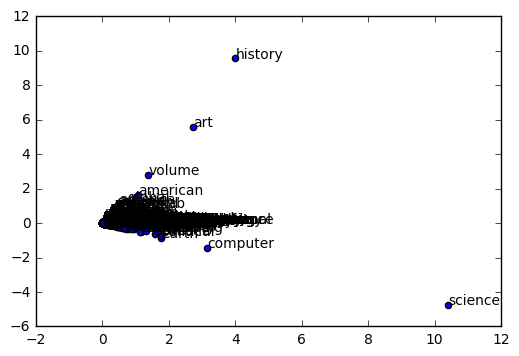

In [64]:
plt.scatter(Z[:,0],Z[:,1])
for i in xrange(D):
    plt.annotate(s=index_word_map[i],xy=(Z[i,0],Z[i,1]))